# 05_modeling.ipynb

**Goals:**  
1. Load the modeling dataset (`model_data.csv`)  
2. Prepare features (`X`) and target (`y`)  
3. Split into train/validation sets  
4. Train baseline model (Linear Regression)  
5. Evaluate with MAE, RMSE, and R²  
6. Train two more models: Random Forest and XGBoost  
7. Compare performance and inspect feature importances  

In [3]:
# If needed, install scikit-learn and xgboost
!pip install scikit-learn xgboost --quiet

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Path to your modeling dataset
model_path = "/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/data/processed/model_data.csv"
df_model = pd.read_csv(model_path)

# Drop rows where target is missing (Fold 7)
df_train = df_model.dropna(subset=["FirstMonthSales"]).copy()
df_predict = df_model[df_model.FirstMonthSales.isna()].copy()

print("Training rows:", df_train.shape)
print("Prediction row(s):", df_predict.shape)
df_train.head(3)


Training rows: (3, 28)
Prediction row(s): (1, 28)


,Version,TotalPosts,OverallMentions,OverallPolarity,battery_mentions,battery_polarity,camera_mentions,camera_polarity,price_mentions,price_polarity,...,software_mentions,software_polarity,design_mentions,design_polarity,size_mentions,size_polarity,weight_mentions,weight_polarity,LaunchDate,FirstMonthSales
0,Fold 4,519,595,0.092322,102,0.112972,91,0.124858,68,0.131462,...,43,0.118108,45,0.123725,50,0.114349,20,0.142453,2022-07-26,300000.0
1,Fold 5,493,592,0.107465,107,0.133532,88,0.137249,63,0.121108,...,52,0.136064,42,0.141732,47,0.110924,25,0.131902,2023-07-28,375000.0
2,Fold 6,485,487,0.122141,92,0.148525,85,0.153839,47,0.146964,...,37,0.124256,33,0.123294,49,0.123152,17,0.137520,2024-07-31,450000.0


In [9]:
# Features are all columns except Version, LaunchDate, FirstMonthSales
drop_cols = ["Version", "LaunchDate", "FirstMonthSales"]
X = df_train.drop(columns=drop_cols)
y = df_train["FirstMonthSales"]

# For final prediction set
X_pred = df_predict.drop(columns=drop_cols)

print("X shape:", X.shape, "y shape:", y.shape)

X shape: (3, 25) y shape: (3,)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape)


Train: (2, 25) Val: (1, 25)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

# Evaluation
mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = mean_squared_error(y_val, y_pred_lr, squared=False)
r2_lr = r2_score(y_val, y_pred_lr)

print(f"Linear Regression → MAE: {mae_lr:.0f}, RMSE: {rmse_lr:.0f}, R²: {r2_lr:.2f}")

Linear Regression → MAE: 71716, RMSE: 71716, R²: nan


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


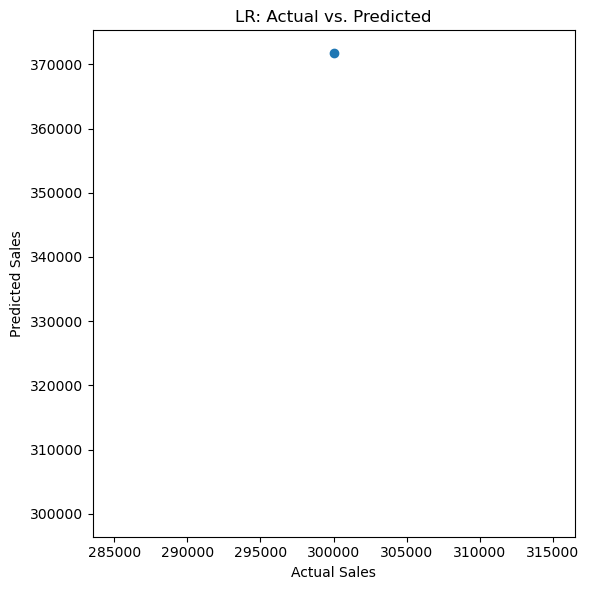

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_lr)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("LR: Actual vs. Predicted")
plt.tight_layout()
plt.show()

In [17]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

# Evaluate both
for name, y_pred in [("RF", y_pred_rf), ("XGB", y_pred_xgb)]:
    mae = mean_absolute_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)
    print(f"{name} → MAE: {mae:.0f}, RMSE: {rmse:.0f}, R²: {r2:.2f}")

RF → MAE: 104250, RMSE: 104250, R²: nan
XGB → MAE: 75000, RMSE: 75000, R²: nan


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


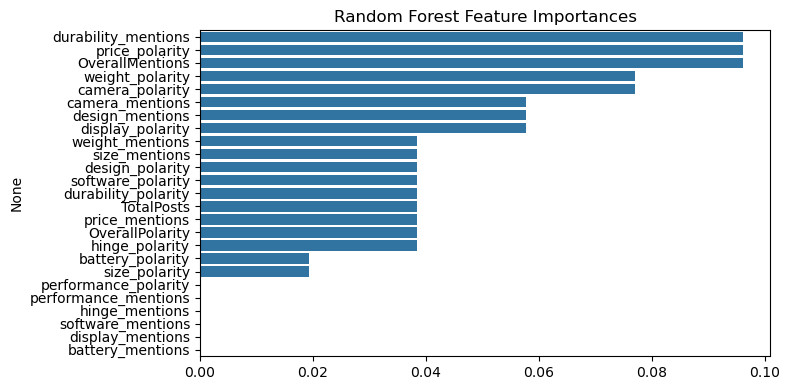

In [19]:
imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=imp_rf.values, y=imp_rf.index)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

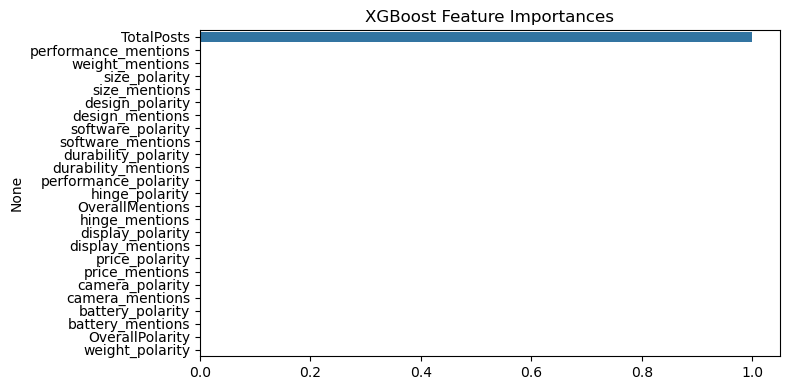

In [21]:
imp_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=imp_xgb.values, y=imp_xgb.index)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

In [29]:
param_grid = {
    "n_estimators": [50,100,200],
    "max_depth": [3,5,7],
    "min_samples_split": [2,5,10]
}
# Adjust cross-validation for small datasets using Leave-One-Out
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# Define Leave-One-Out cross-validator
cv_method = LeaveOneOut()

# Hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

# Perform grid search with Leave-One-Out CV
gs = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=cv_method,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

gs.fit(X_train, y_train)

# Extract best estimator and evaluate
df_best = gs.best_estimator_
print("Best params:", gs.best_params_)
y_pred_best = df_best.predict(X_val)
print("Tuned RF MAE:", mean_absolute_error(y_val, y_pred_best))


Best params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Tuned RF MAE: 100500.0


In [45]:
# Use your best model (e.g. tuned RF or XGB)
model_final = df_best  # or rf, xgb, depending on performance

predicted_sales = model_final.predict(X_pred)[0]
print(f"Predicted Fold 7 first-month sales: {predicted_sales:.0f} units")


Predicted Fold 7 first-month sales: 415500 units


In [49]:
import joblib

# Save the model
joblib.dump(model_final, "/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/models/fold_sales_model.pkl")

# Save a small results CSV
df_predict["PredictedSales"] = predicted_sales
df_predict.to_csv("data/processed/fold7_prediction.csv", index=False)